# Music machine learning - Introduction

### Author: Philippe Esling (esling@ircam.fr)

In this course we will cover
1. A [first definition](#definition) on the concept of machine learning
2. An introduction to a simple problem of [linear regression](#regression)
3. An explanation on [model capacity and overfitting](#capacity)
4. An introduction to the [audio datasets](#audio) that we will use

<a id="definition"></a>
## Defining machine learning

In all natural process, there exists complex relations between sets $\mathcal{X} \mapsto \mathcal{Y}$. This can relate some objects with their names, or a cause to a consequence. In most cases, _we do not know the precise relations_ between these sets, all we have is _observations_ such as pairs $(x,y)$, composed of input data $x \in \mathcal{X}$, which have a corresponding expected output $y \in \mathcal{Y}$. The overarching goal of machine learning is to approximate such _unknown processes_ as a function $\mathcal{F}_{\theta}$, which _transforms_ input data $x$ into output data $y$.

<img src="images/01_machine_learning_basic.png" align="center"/>

Hence, machine learning aims to understand and model the relationship between some (usually complex and high-dimensional) inputs $\mathbf{x}\in\mathcal{X}\subset\mathbb{R}^{\mathcal{X}}$ and outputs $\mathbf{y}\in\mathcal{Y}\subset\mathbb{R}^{\mathcal{Y}}$, given by a set of data examples $\mathcal{D}=\left\{(x_1,y_1),\cdots,(x_N,y_N)\right\}$. This is achieved by defining a parametric model $f_{\mathbf{\theta}}\in\mathcal{F}$ inside a family of functions $\mathcal{F}$, which depends on parameters $\mathbf{\theta} \in \mathbf{\Theta}$ and that could approximate the underlying relationship. The _learning_ aspect refers to the adjustment of the parameters $\mathbf{\theta}$ in order to obtain the best approximation of the given task
$$
\begin{equation}
f_{\mathbf{\theta}}(\mathbf{x}) = \hat{\mathbf{y}}\approx \mathbf{y}.
\end{equation}
$$

To observe this idea in simple setups, we are going to use the `numpy` library and `matplotlib` for plotting. We also set some fixed random generator, to ensure reproducibility

In [1]:
# Base imports
import numpy as np
import matplotlib.pyplot as plt
from helper_plot import prep_plots, finalize_plots, hdr_plot_style
rng = np.random.RandomState(1)

<a id="regression"></a>
## Simple learning problem

Imagine that a certain process somewhere follows the form of a quadratic relationship

$$
 y = a x^{2} + bx + c 
$$

In this case, all the **unknown parameters** are that of a polynomial model, therefore we have $\theta = \{a, b, c\}$. However, this is clearly an ideal (clean) case, whereas in natural observations, there might be some noise in our observations
$$
 y = a x^{2} + bx + c +\epsilon \quad \mbox{with} \quad \epsilon \in [-0.1, 0.1]
$$

An example of such noisy observations for different parameters is given below

## Notes

linspace - gives you 100 points between 0, 1 \
poly1d - one dimensional polynomial class \
random.uniform - draw samples from a uniform distribution (each point has the same probability to be chosen) \
x.shape - gives you the number of points of x (something like length of the array, but can give multi dimensional values) \
poly - is now a function \
poly(x) - calculating for x \
plt.plot(x,y) - easiest way to plot 

/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


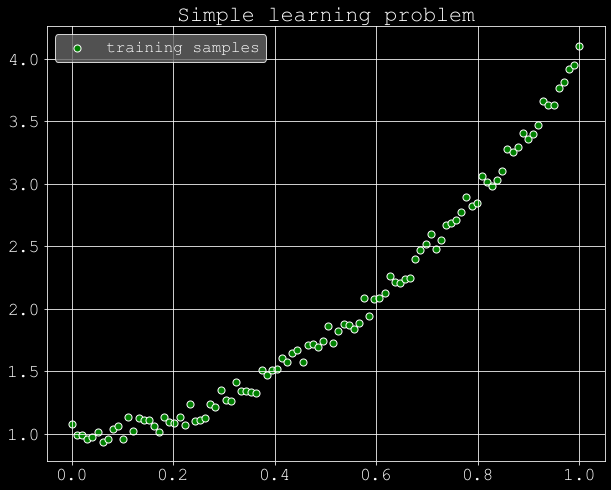

In [2]:
noise_level = 0.1
a, b, c = 3, 0, 1
# Generating 
x = np.linspace(0, 1, 100)
poly = np.poly1d([a, b, c])
epsilon = np.random.uniform(-noise_level,noise_level,x.shape)
y = poly(x) + epsilon
ax1, = prep_plots(["Simple learning problem"], fig_size=(10,8), fig_num=1)
ax1.scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots([ax1], fig_title="")
#plt.xlim([-1, 2])

Now our main problem is that this function can follow different types of parameters

/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


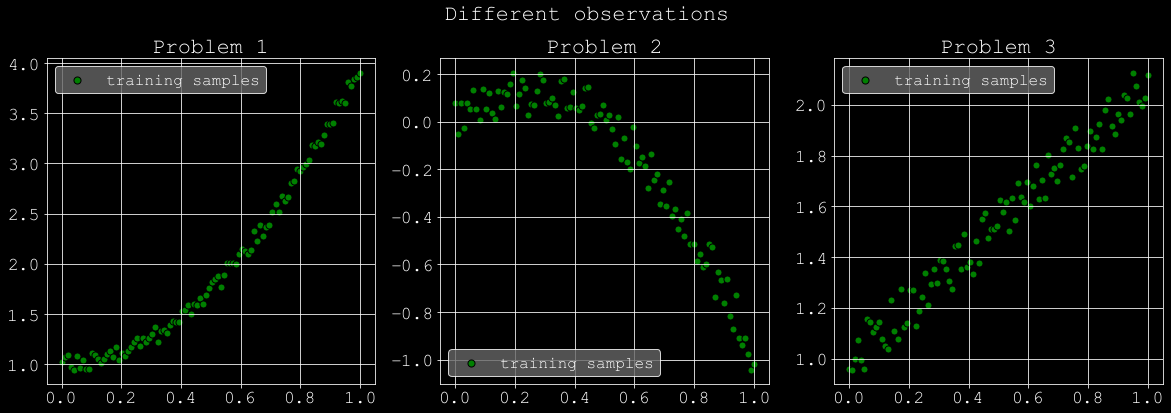

In [3]:
params = [[3, 0, 1], [-2, 1, 0], [0.1, 1, 1]]
ax = prep_plots(["Problem 1", "Problem 2", "Problem 3"], fig_size=(20,6), fig_num=1)
# Generating 
x = np.linspace(0, 1, 100)
for p in range(len(params)):
    poly = np.poly1d(params[p])
    epsilon = np.random.uniform(-noise_level,noise_level,x.shape)
    y = poly(x) + epsilon
    ax[p].scatter(x, y, color='green', s=50, marker='o', edgecolor='k', label="training samples")
finalize_plots(ax, fig_title="Different observations")

In real-life settings, this function can also have different levels of noise, as exemplified in the following code.

/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


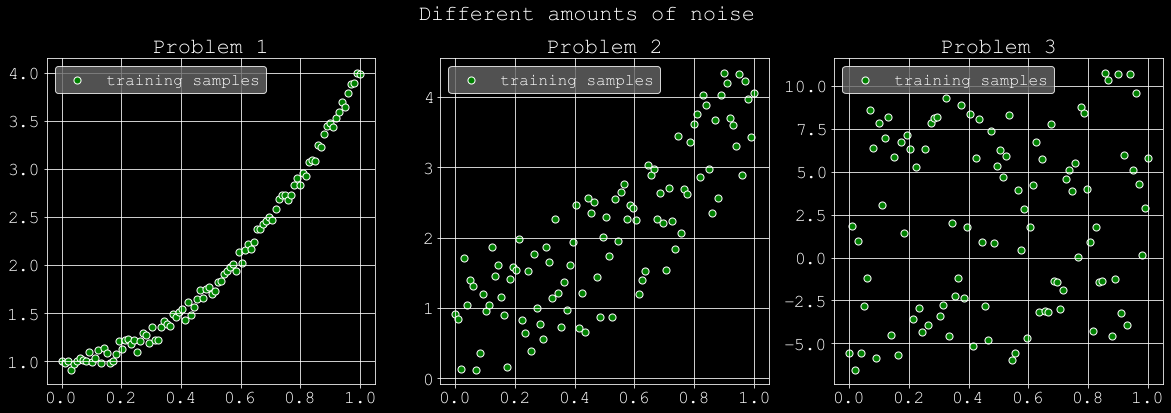

In [4]:
params = [3, 0, 1]
noise_levels = [0.1, 1.0, 8.0]
ax = prep_plots(["Problem 1", "Problem 2", "Problem 3"], fig_size=(20,6), fig_num=1)
# Generating 
x = np.linspace(0, 1, 100)
for p in range(len(noise_levels)):
    poly = np.poly1d(params)
    epsilon = np.random.uniform(-noise_levels[p],noise_levels[p],x.shape)
    y = poly(x) + epsilon
    ax[p].scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots(ax, fig_title="Different amounts of noise")

To summarize, we will have some observations of a function, and we would like to optimize a function that gets as close as possible to the real function that generated this data. Here, we plot the real function and also _subsample_ our number of observations (having only a few points to find the corresponding function)

## Notes

### Real machine learning problem 

So remember that rng has been defined above 
```python
rng = np.random.RandomState(1)
```
which is a package or lib that exposes a number of methods for generating random numbers.

`rng.shuffle(x_all)` - generates number from x_all and modifies an array or sequence in-place by shuffling its contents.
`np.sort(x_all[:10])` - take the 10 first points and sort it
`np.poly1d([3,0,1])` - defining a polynom
`epsilon = np.random.uniform(-0.1,0.1,x.shape)` - the range is -0.1 to 0.1 with `x.shape` points chosen randomly
`np.std(epsilon)` - a function that calculates standard deviation

standard deviation - how far are the points from each other. If the points are scattered all over the place, the standard deviation is high. If the points are closer to each other, the standard deviation is low.

/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


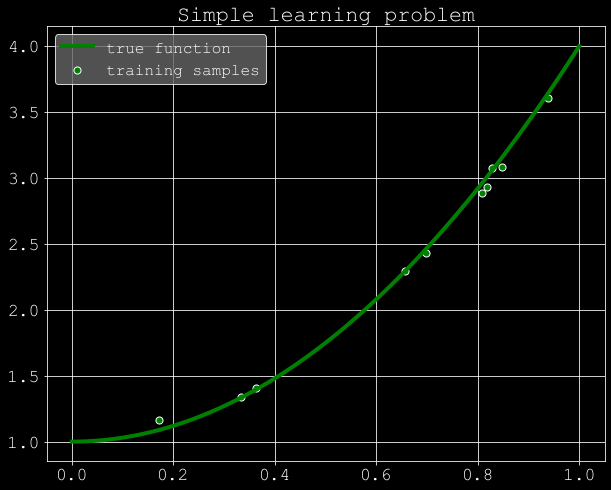

In [5]:
# Generating the data and subsampling
x_all = np.linspace(0, 1, 100); x_plot = np.linspace(0, 1, 100)
rng.shuffle(x_all); x = np.sort(x_all[:10])
poly = np.poly1d([3,0,1])
# Adding some external
epsilon = np.random.uniform(-0.1,0.1,x.shape)
y = poly(x)+ epsilon
# We keep the standard deviation for later
nnstd = np.std(epsilon); lw = 2
ax1, = prep_plots(["Simple learning problem"], fig_size=(10,8), fig_num=1)
ax1.plot(x_plot, poly(x_plot), color='green', linewidth=4, label='true function')
ax1.scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots([ax1], fig_title="")

To get a first grip on what machine learning does, we will rely on the `scikit-learn` library. This contains already coded models and learning procedure, that will allow us to _learn_ the parameters of this unknown function.

Here we already know that we want to use a `PolynomialFeatures` model to perfom `LinearRegression` and that this polynomial should be of degree 2.

## Notes

#### Linear Regression
Gives you an estimate of the coefficients which gives you the minimum loss (the minimum error, the difference between real value and estimated value)

`PolynomialFeatures` - Adds powers of x as variables (degree = 2) \
`make_pipeline` - Creates/designs our model, our X matrix \
`model.fit` - This is my model, now learn. Learns from the data (X, y) with the model we create with make_pipeline \
`np.newaxis` - Add new dimension

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Our data to fit
X = x[:, np.newaxis]
# Degree of our polynomial
degree = 2;
# Create our polynomial model for regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit the parameters of this model
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Now that we have trained the model, we can perform _predictions_ from it, meaning that we can infer the output of the function at values that we did not observe originally.

## Notes

#### Now our model has already learned

`mode['linearregression'].coef` - tells us the coefficients that the model learnt. \
`X_plot = x_plot[:, np.newaxis]` - Building the design matrix. `model.predict` and `model.fit` can only accept 2D matrixes \
`y_plot = model.predict(X_plot)` - Predict the new values based on the model. \
`Y_model_err = np.sqrt(np.mean(np.square(y-model.predict(X))))` - Measures the distance between what the model predicted and the real values (using old points)

#### Outliers
Something that is not following the global trend of patterns.


Model error : 0.03003379147791324


/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


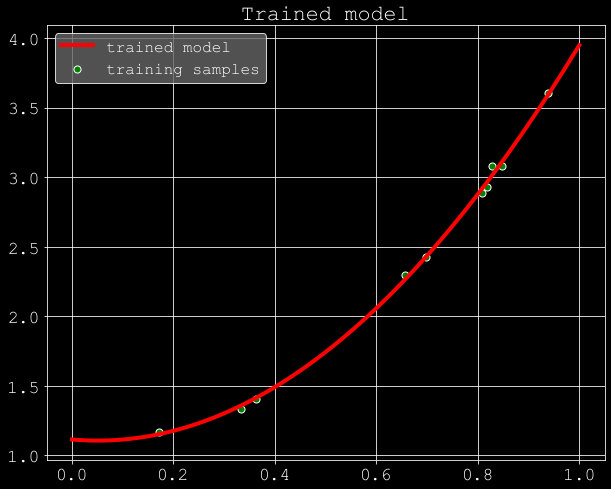

In [7]:
# Inference points (not observed)
X_plot = x_plot[:, np.newaxis]
# Predict the values
y_plot = model.predict(X_plot)
# Compute the error of our model at observed points
Y_model_err = np.sqrt(np.mean(np.square(y-model.predict(X))))
# Plot the result
ax1, = prep_plots(["Trained model"], fig_size=(10,8), fig_num=1)
ax1.plot(x_plot, y_plot, color='red', linewidth=4, label='trained model')
ax1.scatter(x, y, color='green', s=50, marker='o', edgecolor='w', label="training samples")
finalize_plots([ax1], fig_title="")
print(f'Model error : {Y_model_err}')

<a id="capacity"></a>
## Understanding model capacity and selection


In real-life problem, we are aiming to find the parameters of a model, but we do not really know what is the _real_ function underlying this process. So what we can decide to select _any_ function of _any_ **capacity** (complexity of the function). One of the problem with that, is that if we have a too simple function, it will _underfit_ (it is not complex enough for our observations). On the opposite end, if we have a function which is too complex, it might be able to _fit through all training points exactly_ ... even though there is noise in our observations ! This is examplified in the following

<img src="images/01_soa_function_families.png" align="center"/>

We can observe this idea and play with it directly by trying to find a function approximating our previous observations with a polynomial function chosen to have a degree inside \([1,2,8]\).


/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False
/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


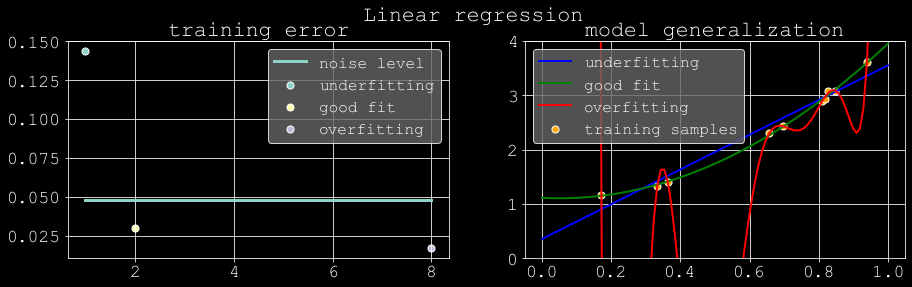

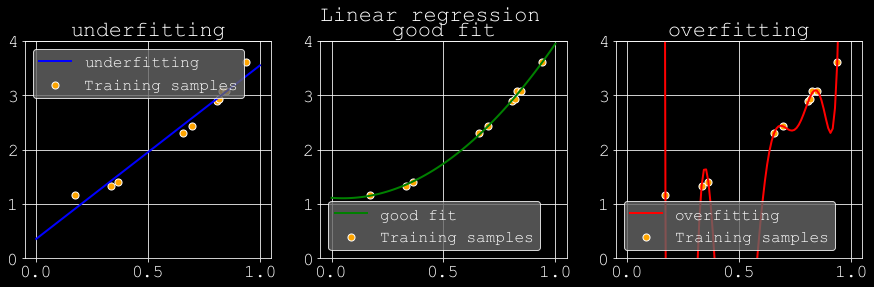

In [226]:
X_plot = x_plot[:, np.newaxis]
ax1, ax2 = prep_plots(["training error", "model generalization"], fig_size=(15,4), fig_num=1)
ax1.plot([1,8], [nnstd, nnstd], label="noise level")
ax2.scatter(x, y, color='orange', edgecolor='w', s=50, marker='o', label="training samples")
colors = ['blue', 'green', 'red']; labels = ['underfitting', 'good fit', 'overfitting']
axes_sub = prep_plots(labels, fig_size=(15,4), fig_num=2)
# Optimize different degree polynomials
for count, degree in enumerate([1,2,8]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    Y_model_err = np.sqrt(np.mean(np.square(y-model.predict(X))))
    y_plot = model.predict(X_plot)
    ax1.scatter(degree, Y_model_err, s=50, marker="o", edgecolor='w', label=labels[count])
    ax2.plot(x_plot, y_plot, color=colors[count], linewidth=2,label=labels[count])
    ax2.set_ylim((0,4))
    axes_sub[count].scatter(x, y, color='orange', edgecolor='w', s=50, marker='o', label="Training samples")
    axes_sub[count].plot(x_plot, y_plot, color=colors[count], linewidth=2,label=labels[count])
    axes_sub[count].set_ylim((0,4))
finalize_plots(axes_sub, fig_title="Linear regression")
finalize_plots([ax1,ax2], fig_title="Linear regression")


Depending on the _capacity_ of the model, what we can observe is that

- `capacity too low   -> underfitting   : prediction variance >  noise variance`
- `adequate capacity  -> good fit       : prediction variance == noise variance`
- `capacity too high  -> overfitting    : prediction variance <  noise variance`


A similar example can be given for a classification problem in two dimensions as follows

<img src="images/01_underfit.png" align="center"/>


<a id="audio"></a>
## Audio applications

In order to test our algorithms on audio and music data, we will work with several datasets that should be downloaded on your local computer first from this [link ![](images/file.png)](https://nuage.ircam.fr/index.php/s/FTsaaAMFV1jEwsk)

  |**Type**|*Origin*|
  |-------:|:---------|
  |**Classification**|[*MuscleFish*](http://knight.cis.temple.edu/~vasilis/Courses/CIS750/Papers/muscle_fish.pdf) dataset|
  |**Music-speech**|[*MIREX Recognition*](http://www.music-ir.org/mirex/wiki/2015:Music/Speech_Classification_and_Detection) set|
  |**Source separation**|[*SMC Mirum*](http://smc.inesctec.pt/research/data-2/) dataset|
  |**Speech recognition**|[*CMU Arctic*](http://festvox.org/cmu_arctic/) dataset|

**Unzip the file and place the `data` folder along with the other code folders**
For the first parts of the tutorial, we will mostly rely solely on the classification dataset. In order to facilitate the interactions, we provide the function `import_dataset` that will allow to import all audio datasets along the tutorials.

```Python
def importDataset(class_path, type):
    """
    Helper function to import datasets
    % class_path  : Path to the dataset (string)
    % type       : Type of dataset (string: 'classify', 'plain', 'metadata')
    """ 
    # Returns the data_struct structure with
    data_struct["filenames"]  # Cell containing the list of audio files
    data_struct["classes"]    # Vector of indexes assigning each file to a class
    data_struct["class_names"] # Cell of class names
    return data_struct
```
  
***

**_Exercise_**  

  1. Launch the import procedure  and check the corresponding structure
  2. Code a count function that prints the name and number of examples for each classes 

***

In [88]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from helper_data import import_dataset
# 0.1 - Import the classification dataset
class_path = 'datasets/classification';
data_struct = import_dataset(class_path, 'classification');

    - Importing dataset datasets/classification.



In [96]:
#%% Q-0.1.2 - Count function to print the number of examples

######################
# YOUR CODE GOES HERE
######################

def count(data):
    for val in data.get('class_names') :
        #print(data.get('class_names').index(val), val)
        count = 0
        for i in data.get('classes') :
            if i == data.get('class_names').index(val):
                count+=1
        print(data.get('class_names').index(val), val, count)
        
        
count(data_struct)


0 bells 7
1 speech.male 17
2 water 7
3 oboe 32
4 altotrombone 13
5 speech.female 35
6 telephone 17
7 percussion 99
8 violinpizz 40
9 laughter 7
10 machines 11
11 tubularbells 20
12 animals 9
13 violinbowed 45
14 cellobowed 47
15 crowds 4


### Preprocessing

We will rely on a set of spectral transforms that allow to obtain a more descriptive view over the audio information. As most of these are out of the scope of the machine learning course, we redirect you to a [signal processing course](https://ccrma.stanford.edu/~jos/sasp/) proposed by [Julius O. Smith](https://ccrma.stanford.edu/~jos/).  

The following functions to compute various types of transforms are given as part of the basic package, in the `helper_data.py` file  

  |**File**|*Transform*|
  |-------:|:----------|
  |`stft.m`       |[Short-term Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)|
  |`fft2barkmx.m` |[Bark scale](https://en.wikipedia.org/wiki/Bark_scale) transform|
  |`fft2melmx.m`  |[Mel scale](https://en.wikipedia.org/wiki/Mel_scale) transform|
  |`fft2chromamx` |[Chromas vector](https://en.wikipedia.org/wiki/Harmonic_pitch_class_profiles)|
  |`spec2cep.m`   |[Cepstrum](https://en.wikipedia.org/wiki/Cepstrum) transform|
  |`cqt.m`        |[Constant-Q](https://en.wikipedia.org/wiki/Constant_Q_transform) transform|

In order to perform the various computations, we provide the following function, which performs the different transforms on a complete dataset.  

``` Python
def computeTransforms(data_struct)
    """ data_struct   : Dataset structure with filenames """
    return data_struct

# Returns the data_struct structure with
data_struct["spectrum_power"]     # Power spectrum (STFT)
data_struct["spectrum_mel"]       # Spectrum in Mel scale
data_struct["spectrum_chroma"]    # Chroma vectors
data_struct["spectrum_CQT"]       # Constant-Q transform
```


***

**Exercise**  

  1. Launch the transform computation procedure and check the corresponding structure
  2. For each class, select a random element and plot its various transforms on a single plot. You should obtain plots similar to those shown afterwards.
  3. For each transform, try to spot major pros and cons of their representation.
  
***

In [108]:
# 0.2 - Pre-process the audio to obtain spectral transforms 
# (may take around a minute)
from helper_data import compute_transforms
data_struct = compute_transforms(data_struct);

    - Performing transforms.
21665
1024
11425
1024
12033
1024
11553
1024
21986
1024
11137
1024
26658
1024
5217
1024
7105
1024
12609
1024
3425
1024
6881
1024
10977
1024
7073
1024
10626
1024
8865
1024
7298
1024
7170
1024
3362
1024
3329
1024
5505
1024
4577
1024
6337
1024
7458
1024
175196
1024
41665
1024
134012
1024
55170
1024
22081
1024
127037
1024
118497
1024
34029
1024
27235
1024
31831
1024
24224
1024
29589
1024
30343
1024
28612
1024
24469
1024
32502
1024
28987
1024
29597
1024
27589
1024
30723
1024
35863
1024
26375
1024
31149
1024
31667
1024
24719
1024
36978
1024
27165
1024
30077
1024
33838
1024
35835
1024
30605
1024
29884
1024
29625
1024
28010
1024
30241
1024
27983
1024
33241
1024
31101
1024
28642
1024
31579
1024
28309
1024
18766
1024
13006
1024
12424
1024
18666
1024
13390
1024
18642
1024
27934
1024
22242
1024
23506
1024
22319
1024
23870
1024
6850
1024
7393
1024
9281
1024
5538
1024
3969
1024
5089
1024
2977
1024
4321
1024
3265
1024
7969
1024
6401
1024
6689
1024
8001
1024
6209
1024
7553


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=312
  warnings.warn(


51668
1024
46042
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=404
  warnings.warn(


47670
1024
42585
1024
38457
1024
35143
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=301
  warnings.warn(


40147
1024
30855
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=483
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=242
  warnings.warn(


45607
1024
33548
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=263
  warnings.warn(


65551
1024
40027
1024
30128
1024
34709
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=236
  warnings.warn(


41443
1024
21213
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=324
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=332
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=166
  warnings.warn(


21852
1024
38471
1024
22114
1024
34252
1024
41734
1024
29960
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=469
  warnings.warn(


16916
1024
32976
1024
36424
1024
19998
1024
41317
1024
26958
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=422
  warnings.warn(


39794
1024
23099
1024
22850
1024
34472
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=270
  warnings.warn(


54436
1024
36230
1024
50840
1024
42036
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=398
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=329
  warnings.warn(


32290
1024
33000
1024
37032
1024
48575
1024


/Applications/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=290
  warnings.warn(


50742
1024
47677
1024
43119
1024
39489
1024
40787
1024
37713
1024
39487
1024
33569
1024
43640
1024


In [294]:
#%% Q-0.2.2 - Plot the various transforms 

# Just a little helper to make your figures pretty
from helper_plot import hdr_plot_style
hdr_plot_style()

import random

######################
# YOUR CODE GOES HERE
######################

# Returns the data_struct structure with
#data_struct["spectrum_power"]     # Power spectrum (STFT)
#data_struct["spectrum_mel"]       # Spectrum in Mel scale
#data_struct["spectrum_chroma"]    # Chroma vectors
#data_struct["spectrum_CQT"]       # Constant-Q transform


#for val in data_struct.keys() :
    #myList = list(data_struct.keys())
    #transforms = list(data_struct.keys())[-4:]
    #print(myList.index(val), transforms)
    #print(random.choice(val))
    
print(data_struct.keys(), '\n')
print(len(data_struct), '\n')

def count(data):
    totalClassNames = data.get('class_names')
    totalClasses = data.get('classes')
    
    
    for eachClass in totalClassNames:
        count = 0
        totalClassElements = []
        spectrumPower = []
        for eachIndex in totalClasses: 
            if eachIndex == data.get('class_names').index(eachClass):
                totalClassElements.append(data['filenames'][count])
                spectrumPower.append((data['spectrum_power'][count]))
                #print(spectrumPower)
            count+=1
        print("Class:",eachClass,'\n')
        randomElement = random.choice(totalClassElements)
        print('Random element selected for', eachClass,'is', randomElement,'\n')
        
count(data_struct)

dict_keys(['filenames', 'classes', 'class_names', 'signal', 'srate', 'spectrum_power', 'spectrum_mel', 'spectrum_chroma', 'spectrum_CQT']) 

9 

Class: bells 

Random element selected for bells is datasets/classification/bells/bellTower7.wav 

Class: speech.male 

Random element selected for speech.male is datasets/classification/speech.male/male2.giant.wav 

Class: water 

Random element selected for water is datasets/classification/water/rapids.wav 

Class: oboe 

Random element selected for oboe is datasets/classification/oboe/oboe14.wav 

Class: altotrombone 

Random element selected for altotrombone is datasets/classification/altotrombone/altotrb0.wav 

Class: speech.female 

Random element selected for speech.female is datasets/classification/speech.female/female3.cleveland.wav 

Class: telephone 

Random element selected for telephone is datasets/classification/telephone/teltt8.wav 

Class: percussion 

Random element selected for percussion is datasets/classification/percussion

/Users/aqilahmisuary/Dropbox/ATIAM_projects/atiam_ml/helper_plot.py:18: MatplotlibDeprecationWarning: Support for setting the text.hinting rcParam to True or False is deprecated since 3.2 and will be removed two minor releases later; set it to its synonyms 'auto' or 'none' instead.
  mpl.rcParams['text.hinting'] = False


In [230]:
list(data_struct.keys())[]

['spectrum_power', 'spectrum_mel', 'spectrum_chroma', 'spectrum_CQT']

### Features

<div markdown = "1">

As you might have noted from the previous exercice, most spectral transforms have a very high dimensionality, and might not be suited to exhibit the relevant structure of different classes. To that end, we provide a set of functions for computing several spectral features in the `helper_data` folder, we redirect interested readers to this [exhaustive article](http://recherche.ircam.fr/anasyn/peeters/ARTICLES/Peeters_2003_cuidadoaudiofeatures.pdf) on spectral features computation.

  |**File**|*Transform*|
  |-------:|:----------|
  |`spectral_centroid`|Spectral centroid|
  |`spectral_bandwidth`|Spectral bandwidth|
  |`spectral_contrast`|Spectral contrast|
  |`spectral_flatness`|Spectral flatness|
  |`spectral_rolloff`|Spectral rolloff|

Once again, we provide a function to perform the computation of different features on a complete set. Note that for each feature, we compute the temporal evolution in a vector along with the mean and standard deviation of each feature. We only detail the resulting data structure for a single feature (`SpectralCentroid`).  

``` Python
def data_struct = computeFeatures(data_struct)
     """ data_struct   : Dataset structure with filenames """
    return data_struct

% Returns the data_struct structure with
data_struct["spectral_centroid"]      # Temporal value of a feature
data_struct["spectral_centroid_mean"] # Mean value of that feature
data_struct["spectral_centroid_std"]  # Standard deviation
```

***

**Exercise**

  1. Launch the feature computation procedure and check the corresponding structure
  2. This time for each class, superimpose the plots of various features on a single plot, along with a boxplot of mean and standard deviations. You should obtain plots similar to those shown afterwards.
  3. What conclusions can you make on the discriminative power of each feature ?
  4. Perform scatter plots of the mean features for all the dataset, while coloring different classes.
  5. What conclusions can you make on the discriminative power of mean features ?

***

In [ ]:
#%%
# 0.3 - Compute a set of temporal and spectral features
# (may take around 1-2 minutes)
from helper_data import compute_features
data_struct = compute_features(data_struct);

In [ ]:
#%% Q-0.3.2 - Plot the various features 

# Just a little helper to make your figures pretty
from helper_plot import hdr_plot_style
hdr_plot_style()
# Use these styles for boxplot
boxprops=dict(linewidth=3, color='white')
whiskerprops=dict(linewidth=3, color='white')
medianprops=dict(linewidth=2.5, color='firebrick')
flierprops = dict(markeredgecolor='white', markerfacecolor='firebrick')

######################
# YOUR CODE GOES HERE
######################


In [ ]:
#%% Q-0.3.4 - Observe the distribution of classes for different features

# This allows to use 3D rendering in matplotlib
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(12,8))
# Create a vector of random colors for each class
colorVect = np.zeros((3, len(data_struct["class_names"])));
for c in range(len(data_struct["class_names"])):
    colorVect[:,c] = np.random.rand(3);

######################
# YOUR CODE GOES HERE
######################


That's it for this tutorial, now remember that we can use any form of description (features) as a basis for learning algorithms. We will see in the next tutorial what we an do with these features.